In [30]:
""""""
import pandas as pd

# Define the path to the CSV file
csv_file_path = "/Users/admin/Documents/University/diss-data-collection/Classifier/Sample/combined_utterances_2_final_csv.csv"

# Read the CSV file
data = pd.read_csv(csv_file_path)

# Define the list of female subreddits
female_subreddits = ["Pokimane", "Amouranth", "legendarylea", "KittyKatGaming", "lilypichu"]

# Define a function to assign gender based on subreddit
def assign_gender(subreddit):
    if subreddit in female_subreddits:
        return "Female"
    else:
        return "Male"

# Apply the function to create the 'gender' column
data['gender'] = data['subreddit'].apply(assign_gender)

# Save the modified DataFrame to a new CSV file
output_csv_file_path = "/Users/admin/Documents/University/diss-data-collection/Classifier/Sample/gendered_utterances.csv"
data.to_csv(output_csv_file_path, index=False)

# Print the DataFrame to verify the changes
print(data)


           id    subreddit                                       thread_title  \
0     dywzb12  NinjasHyper                                   Name of the song   
1     e2q0ijd  NinjasHyper  So sad that ninja died if ligma, rip ninja he ...   
2     duf5mqw  NinjasHyper  Raising 100k For Charity!! - Fortnite Battle R...   
3      9jqg7i  NinjasHyper                        5 ads in one YouTube video?   
4     dxgam05  NinjasHyper  Leviathan Solo Squads! - Fortnite Battle Royal...   
...       ...          ...                                                ...   
3995  e6isjsd    lilypichu  A Lily and Xell I made that arnt gunna be used...   
3996   7cpqqn    lilypichu                     Regarding memes and friendship   
3997  dmq2tl6    lilypichu                      Does Lily still date hotshot?   
3998  e1xw0ct    lilypichu  Will you or any offlinetv members be coming to...   
3999  e4502ne    lilypichu                             need to impress m'lily   

                           

In [37]:
'Adding engagement'


Dataset already exists at /Users/admin/.convokit/downloads/subreddit-Amouranth
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-Angory_Tom
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-DanTDM
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-KittyKatGaming
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-LazarBeam
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-NakeyJakey
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-NinjasHyper
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-Pokimane
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-legendarylea
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-lilypichu
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-NinjasHyper
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-NinjasHyper
Dataset already exists at /Users/admin/.

KeyboardInterrupt: 

In [192]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset
file_path = "/Users/admin/Documents/University/diss-data-collection/Classifier/Sample/finaldataset_rounded.csv"
data = pd.read_csv(file_path)

# Convert non-numeric values to NaN in the 'engagement' column
data['engagement'] = pd.to_numeric(data['engagement'], errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Define the independent and dependent variables
X = data[['Parasocial_Language']]  # Independent variable(s)
X = sm.add_constant(X)  # Add a constant term
y = data['engagement']  # Dependent variable

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             engagement   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     43.26
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           5.42e-11
Time:                        22:35:09   Log-Likelihood:                -3567.3
No. Observations:                3989   AIC:                             7139.
Df Residuals:                    3987   BIC:                             7151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9218    

Merge completed and saved to merged_masterpsr.csv


In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Prepare the data
X = data[['Parasocial_Language']]  # Independent variable
y = data['engagement']  # Dependent variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
probs = model.predict_proba(X_test)[:, 1]  # Probabilities of class 1

# Plot the relationship between Parasocial_Language and engagement
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, probs, color='red', label='Predicted (Probabilities)')
plt.xlabel('Parasocial Language')
plt.ylabel('Engagement')
plt.title('Logistic Regression of Parasocial Language on Engagement')
plt.legend()
plt.show()

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)


ValueError: Input y contains NaN.

In [124]:
import pandas as pd

# Load the gendered utterances data
gendered_utterances_file = "/Users/admin/Documents/University/diss-data-collection/Classifier/Sample/gendered_utterances.csv"
gendered_utterances_data = pd.read_csv(gendered_utterances_file)

# Load the processed data containing number_utterances and conversation_id
processed_data_file = "/Users/admin/Documents/University/diss-data-collection/Classifier/Sample/processed_4.csv"
processed_data = pd.read_csv(processed_data_file)

# Load the scores data
scores_file = "/Users/admin/Documents/University/diss-data-collection/Classifier/Sample/score.csv"
scores_data = pd.read_csv(scores_file)

# Merge gendered utterances data with processed data on 'id'
merged_data = pd.merge(gendered_utterances_data, processed_data[['id', 'number_utterances', 'conversation_id']], on='id', how='left')

# Merge with scores data on 'id'
final_dataset = pd.merge(merged_data, scores_data[['id', 'score']], on='id', how='left')

# Save the final dataset
output_file_path = "/Users/admin/Documents/University/diss-data-collection/Classifier/Sample/finaldataset.csv"
final_dataset.to_csv(output_file_path, index=False)

print(f"Final dataset saved to {output_

Final dataset saved to /Users/admin/Documents/University/diss-data-collection/Classifier/Sample/finaldataset.csv


In [170]:
import pandas as pd
import statsmodels.api as sm

# Load the data
file_path = "//Users/admin/Documents/University/diss-data-collection/Classifier/Sample/finaldataset_rounded.csv"
data = pd.read_csv(file_path)

# Define the independent variable (X) and the dependent variable (y)
X = data[['engagement']]
y = data['Parasocial_Language']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the logistic regression model
print(result.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [168]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/Users/admin/Documents/University/diss-data-collection/Classifier/Sample/finaldataset_rounded.csv"
data = pd.read_csv(file_path)

# Fit the linear regression model
X = data['Parasocial_Language']  # Independent variable
y = data['engagement']  # Dependent variable

X = sm.add_constant(X)  # Add a constant term to the independent variable
model = sm.OLS(y, X).fit()  # Fit the model

# Print the model summary
print(model.summary())

# Plot the linear regression
sns.regplot(x=X.iloc[:, 1], y=y, ci=None)
plt.xlabel('Parasocial Language')
plt.ylabel('Engagement')
plt.title('Linear Regression of Parasocial Language on Engagement')
plt.show()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Intercept: 1.9204703037494066
Slope: 0.1282010892395232


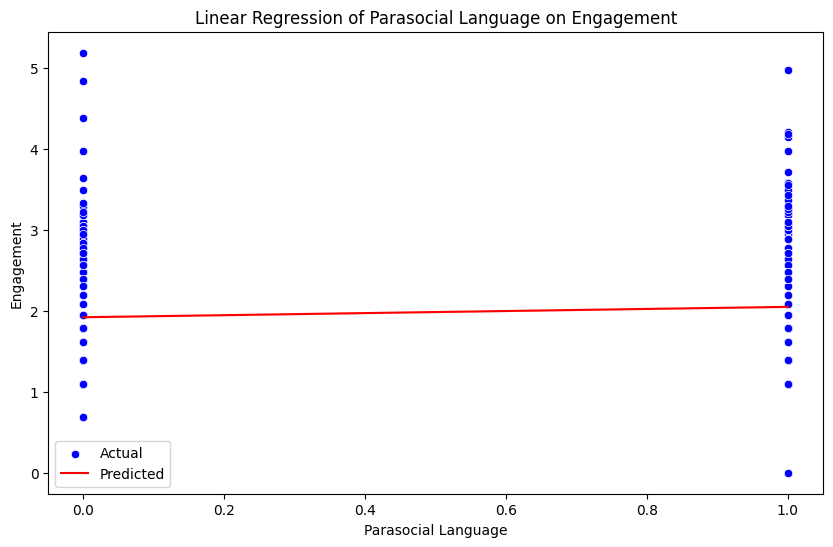

In [186]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/Users/admin/Documents/University/diss-data-collection/Classifier/Sample/finaldataset_rounded.csv"
data = pd.read_csv(file_path)

# Convert non-numeric values to NaN
data['engagement'] = pd.to_numeric(data['engagement'], errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Split the data into independent (X) and dependent (y) variables
X = data['Parasocial_Language'].values.reshape(-1, 1)  # Independent variable
y = data['engagement']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Print the coefficients
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

# Predict on the test set
y_pred = model.predict(X_test)

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.squeeze(), y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test.squeeze(), y=y_pred, color='red', label='Predicted')
plt.xlabel('Parasocial Language')
plt.ylabel('Engagement')
plt.title('Linear Regression of Parasocial Language on Engagement')
plt.legend()
plt.show()
